In [1]:
#importing necessary open source libraries 
# from https://scikit-learn.org/stable/modules/generated/sklearn
# Matplotlib: A 2D Graphics Environment
# Array programming with NumPy
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
%pylab inline
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


## Task 1: GMM
#### The first goal here is to use AUs to classify the expressions in the FER2013 dataset using Gaussian Mixture Models. Use 5-fold cross-validation to report the performance. Report precision, recall, accuracy, F1 score, and create a confusion matrix.

To make it easy to follow, here are 4 steps I used to complete the task

### 1.1. normalize the dataset by converting labels into digits

In [2]:
# load dataset into Pandas DataFrame and display it
df = pd.read_csv('Fer2013/fer2013.csv')
df

# create a list of conditions to represent emotions as numbers, for example, 
conditions = [
    (df['label'] == 'sad'), 
    (df['label'] == 'angry'), 
    (df['label'] == 'surprise'),
    (df['label'] == 'disgust'), 
    (df['label'] == 'neutral'),
    (df['label'] == 'fear'), 
    (df['label'] == 'happy')
    ]

# create a list of the values we want to assign for each condition
values = [5, 3, 0, 1, 2, 6, 4] 

# create a new column and use np.select to assign values to it using our lists as arguments
df['actual'] = np.select(conditions, values)
#df

### 1.2. select necessary features and split the dataset for cross validation

In [3]:
## Separating the dataset into features necessary for unsupervised GMM and labels
feat_lst = []
for i in range(2,37):
    feat_lst.append(i)
    
features = df.iloc[:, feat_lst]
labels = df.iloc[:, [37,38]]


In [4]:
## cv_test_sets will include the indeces of 5 validation sets that are taken randomly (11 from each class)

cv_test_sets = [[],[],[],[],[]]

def get_test_data_slices(i): # returns a list of 77 number that represent indices of the validation sets
    test_rows_indx = [i]
    
    for j in range(1,20):
        test_rows_indx.append(i+1)
        i +=1
        
    i += 110
    for j in range(1,20):
        test_rows_indx.append(i+1)
        i +=1

    i += 100

    for j in range(1,20):
        test_rows_indx.append(i+1)
        i +=1

    i += 90
    for j in range(1,20):
        test_rows_indx.append(i+1)
        i +=1    
    
    i += 110
    for j in range(1,20):
        test_rows_indx.append(i+1)
        i +=1

    i += 130
    for j in range(1,20):
        test_rows_indx.append(i+1)
        i +=1
    
    i += 105
    for j in range(1,20):
        test_rows_indx.append(i+1)
        i +=1   

    return test_rows_indx


k = 2        
for cv in range(5):
    cv_test_sets[cv] = get_test_data_slices(k) # populating the list with the validation set indices
    k +=7
        

### 1.3. actual training and calculating the accuracy scores for 5 validation sets¶

#### 1st fold for GMM

Precision: 0.182
Recall: 0.157
Accuracy: 0.157
F1 Score: 0.144


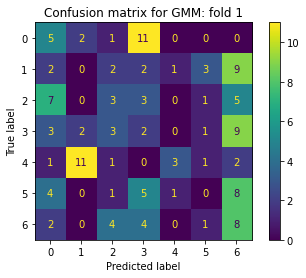

In [5]:
## Splitting the dataset
CV_acc_lst = [[],[],[],[],[]] # the list for CV accuracies 
test_data_sets = [] # saving the test data here for future use
prec_lst = [[],[],[],[],[]] # to store values and compare them later
recall_lst = [[],[],[],[],[]]# to store values and compare them later
accuracy_lst = [[],[],[],[],[]]# to store values and compare them later
f1_lst = [[],[],[],[],[]]# to store values and compare them later

full_indx = [] # th elist of all indeces
for i in range(2,812):
    full_indx.append(i)

cv_train_set = list(set(full_indx)^set(cv_test_sets[0])) # list of train set indeces
train_no_labels = features.iloc[cv_train_set] # train data with no labels
test_no_labels = df.iloc[cv_test_sets[0], feat_lst] # testing set with no labels
test_labels = df.iloc[cv_test_sets[0], 37:] # labels for testing


## Apllying GMM
gm = GaussianMixture(n_components=7,covariance_type='full', random_state=0).fit(train_no_labels) #train the model
    
gm.predict(test_no_labels) # predict on validation/testing set
predicted = gm.predict(test_no_labels).tolist() # save predicted values for further evaluation 
    

test_labels.insert(2, "Predicted", predicted, True) # create a cloumnn of predicted data
comparison_table = test_labels
test_data_sets.append(comparison_table) 

## Accuracy calculation 
acc = accuracy_score(comparison_table['Predicted'], comparison_table['actual']) #calculate accuracy score
CV_acc_lst[0] =(acc) #  populate the list CV_acc_lst, where the cross validation test accuracies are stored
acc

## building confusion matrix
y_test  = test_data_sets[0]['actual']
predictions = test_data_sets[0]['Predicted']
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set_title('Confusion matrix for GMM: fold 1')

## print presision, recall, accuracy, F1 score

print('Precision: %.3f' % precision_score(y_test, predictions, average='weighted'))
print('Recall: %.3f' % recall_score(y_test, predictions, average='weighted'))
print('Accuracy: %.3f' % accuracy_score(y_test, predictions))
print('F1 Score: %.3f' % f1_score(y_test, predictions, average='weighted'))

prec_lst[0] = precision_score(y_test, predictions, average='weighted')
recall_lst[0] = recall_score(y_test, predictions, average='weighted')
accuracy_lst[0] = accuracy_score(y_test, predictions)
f1_lst[0] = f1_score(y_test, predictions, average='weighted')

#### 2nd fold for GMM

Precision: 0.222
Recall: 0.224
Accuracy: 0.224
F1 Score: 0.215


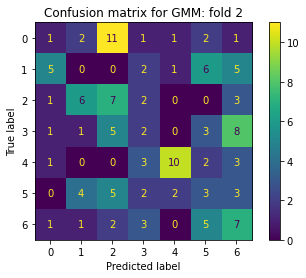

In [6]:
## Splitting the dataset

full_indx = [] # th elist of all indeces
for i in range(1,812):
    full_indx.append(i)

cv_train_set = list(set(full_indx)^set(cv_test_sets[1])) # list of train set indeces
train_no_labels = features.iloc[cv_train_set] # train data with no labels
test_no_labels = df.iloc[cv_test_sets[1], feat_lst] # testing set with no labels
test_labels = df.iloc[cv_test_sets[1], 37:] # labels for testing


## Apllying GMM
gm = GaussianMixture(n_components=7,covariance_type='full', random_state=0).fit(train_no_labels) #train the model
    
gm.predict(test_no_labels) # predict on validation/testing set
predicted = gm.predict(test_no_labels).tolist() # save predicted values for further evaluation 
    

test_labels.insert(2, "Predicted", predicted, True) # create a cloumnn of predicted data
comparison_table = test_labels
test_data_sets.append(comparison_table) 

## Accuracy calculation 
acc = accuracy_score(comparison_table['Predicted'], comparison_table['actual']) #calculate accuracy score
CV_acc_lst[1] =(acc) #  populate the list CV_acc_lst, where the cross validation test accuracies are stored
acc

## building confusion matrix
y_test  = test_data_sets[1]['actual']
predictions = test_data_sets[1]['Predicted']
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set_title('Confusion matrix for GMM: fold 2')

## print presision, recall, accuracy, F1 score

print('Precision: %.3f' % precision_score(y_test, predictions, average='weighted'))
print('Recall: %.3f' % recall_score(y_test, predictions, average='weighted'))
print('Accuracy: %.3f' % accuracy_score(y_test, predictions))
print('F1 Score: %.3f' % f1_score(y_test, predictions, average='weighted'))

prec_lst[1] = precision_score(y_test, predictions, average='weighted')
recall_lst[1] = recall_score(y_test, predictions, average='weighted')
accuracy_lst[1] = accuracy_score(y_test, predictions)
f1_lst[1] = f1_score(y_test, predictions, average='weighted')

#### 3rd fold:

Precision: 0.281
Recall: 0.239
Accuracy: 0.239
F1 Score: 0.243


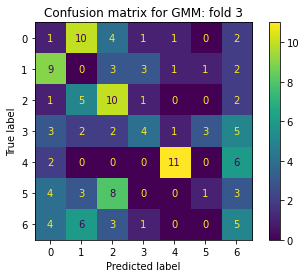

In [7]:
## Splitting the dataset

full_indx = [] # th elist of all indeces
for i in range(1,812):
    full_indx.append(i)

cv_train_set = list(set(full_indx)^set(cv_test_sets[2])) # list of train set indeces
train_no_labels = features.iloc[cv_train_set] # train data with no labels
test_no_labels = df.iloc[cv_test_sets[2], feat_lst] # testing set with no labels
test_labels = df.iloc[cv_test_sets[2], 37:] # labels for testing


## Apllying GMM
gm = GaussianMixture(n_components=7,covariance_type='full', random_state=0).fit(train_no_labels) #train the model
    
gm.predict(test_no_labels) # predict on validation/testing set
predicted = gm.predict(test_no_labels).tolist() # save predicted values for further evaluation 
    

test_labels.insert(2, "Predicted", predicted, True) # create a cloumnn of predicted data
comparison_table = test_labels
test_data_sets.append(comparison_table) 

## Accuracy calculation 
acc = accuracy_score(comparison_table['Predicted'], comparison_table['actual']) #calculate accuracy score
CV_acc_lst[2] =(acc)#  populate the list CV_acc_lst, where the cross validation test accuracies are stored
acc

## building confusion matrix
y_test  = test_data_sets[2]['actual']
predictions = test_data_sets[2]['Predicted']
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set_title('Confusion matrix for GMM: fold 3')

## print presision, recall, accuracy, F1 score

print('Precision: %.3f' % precision_score(y_test, predictions, average='weighted'))
print('Recall: %.3f' % recall_score(y_test, predictions, average='weighted'))
print('Accuracy: %.3f' % accuracy_score(y_test, predictions))
print('F1 Score: %.3f' % f1_score(y_test, predictions, average='weighted'))

prec_lst[2] = precision_score(y_test, predictions, average='weighted')
recall_lst[2] = recall_score(y_test, predictions, average='weighted')
accuracy_lst[2] = accuracy_score(y_test, predictions)
f1_lst[2] = f1_score(y_test, predictions, average='weighted')

#### 4th fold:

/Users/karlykussainova/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/karlykussainova/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.122
Recall: 0.127
Accuracy: 0.127
F1 Score: 0.104


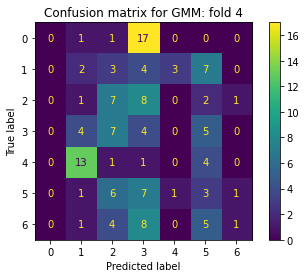

In [8]:
## Splitting the dataset

full_indx = [] # th elist of all indeces
for i in range(1,812):
    full_indx.append(i)

cv_train_set = list(set(full_indx)^set(cv_test_sets[3])) # list of train set indeces
train_no_labels = features.iloc[cv_train_set] # train data with no labels
test_no_labels = df.iloc[cv_test_sets[3], feat_lst] # testing set with no labels
test_labels = df.iloc[cv_test_sets[3], 37:] # labels for testing


## Apllying GMM
gm = GaussianMixture(n_components=7,covariance_type='full', random_state=0).fit(train_no_labels) #train the model
    
gm.predict(test_no_labels) # predict on validation/testing set
predicted = gm.predict(test_no_labels).tolist() # save predicted values for further evaluation 
    

test_labels.insert(2, "Predicted", predicted, True) # create a cloumnn of predicted data
comparison_table = test_labels
test_data_sets.append(comparison_table) 

## Accuracy calculation 
acc = accuracy_score(comparison_table['Predicted'], comparison_table['actual']) #calculate accuracy score
CV_acc_lst[3] =(acc) #  populate the list CV_acc_lst, where the cross validation test accuracies are stored
acc

## building confusion matrix
y_test  = test_data_sets[3]['actual']
predictions = test_data_sets[3]['Predicted']
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set_title('Confusion matrix for GMM: fold 4')

## print presision, recall, accuracy, F1 score

print('Precision: %.3f' % precision_score(y_test, predictions, average='weighted'))
print('Recall: %.3f' % recall_score(y_test, predictions, average='weighted'))
print('Accuracy: %.3f' % accuracy_score(y_test, predictions))
print('F1 Score: %.3f' % f1_score(y_test, predictions, average='weighted'))

prec_lst[3] = precision_score(y_test, predictions, average='weighted')
recall_lst[3] = recall_score(y_test, predictions, average='weighted')
accuracy_lst[3] = accuracy_score(y_test, predictions)
f1_lst[3] = f1_score(y_test, predictions, average='weighted')

#### 5th fold: 

Precision: 0.248
Recall: 0.254
Accuracy: 0.254
F1 Score: 0.231


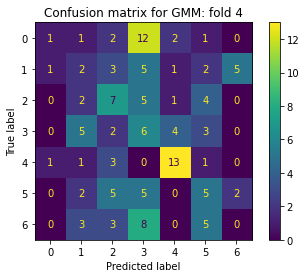

In [9]:
## Splitting the dataset

full_indx = [] # th elist of all indeces
for i in range(1,812):
    full_indx.append(i)

cv_train_set = list(set(full_indx)^set(cv_test_sets[4])) # list of train set indeces
train_no_labels = features.iloc[cv_train_set] # train data with no labels
test_no_labels = df.iloc[cv_test_sets[4], feat_lst] # testing set with no labels
test_labels = df.iloc[cv_test_sets[4], 37:] # labels for testing


## Apllying GMM
gm = GaussianMixture(n_components=7,covariance_type='full', random_state=0).fit(train_no_labels) #train the model
    
gm.predict(test_no_labels) # predict on validation/testing set
predicted = gm.predict(test_no_labels).tolist() # save predicted values for further evaluation 
    

test_labels.insert(2, "Predicted", predicted, True) # create a cloumnn of predicted data
comparison_table = test_labels
test_data_sets.append(comparison_table) 

## Accuracy calculation 
acc = accuracy_score(comparison_table['Predicted'], comparison_table['actual']) #calculate accuracy score
CV_acc_lst[4] =(acc) #  populate the list CV_acc_lst, where the cross validation test accuracies are stored
acc

## building confusion matrix
y_test  = test_data_sets[4]['actual']
predictions = test_data_sets[4]['Predicted']
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set_title('Confusion matrix for GMM: fold 4')

## print presision, recall, accuracy, F1 score

print('Precision: %.3f' % precision_score(y_test, predictions, average='weighted'))
print('Recall: %.3f' % recall_score(y_test, predictions, average='weighted'))
print('Accuracy: %.3f' % accuracy_score(y_test, predictions))
print('F1 Score: %.3f' % f1_score(y_test, predictions, average='weighted'))

prec_lst[4] = precision_score(y_test, predictions, average='weighted')
recall_lst[4] = recall_score(y_test, predictions, average='weighted')
accuracy_lst[4] = accuracy_score(y_test, predictions)
f1_lst[4] = f1_score(y_test, predictions, average='weighted')

In [10]:
CV_acc_lst

[0.15671641791044777,
 0.22388059701492538,
 0.23880597014925373,
 0.12686567164179105,
 0.2537313432835821]

In [11]:
## average model accuracy
model_accuracy = sum(CV_acc_lst) / len(CV_acc_lst)
model_accuracy

0.2

In [12]:
print("Average Scores for GMM ")
print("Average precision score: " + str(sum(prec_lst) / len(prec_lst)))
print("Average recall score: " + str(sum(recall_lst) / len(recall_lst)))
print("Average accuracy score: " + str(sum(accuracy_lst) / len(accuracy_lst)))
print("Average F1 score: " + str(sum(f1_lst) / len(f1_lst)))

Average Scores for GMM 
Average precision score: 0.21098104883493374
Average recall score: 0.2
Average accuracy score: 0.2
Average F1 score: 0.18740037455552855


## Task 2: SVM
#### Classify the images from FER2013 using an SVM. Use 5-fold cross-validation to report the performance. Report precision, recall, accuracy, F1 score, and create a confusion matrix.

Similar steps were taken to complete the task

### 2.1. Splitting data into test/train and train the dataset

In [13]:
X = df.iloc[:, 2:37] # features for svm
y = df.iloc[:, 37:38] # labels for svm

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22, shuffle = True)

## Apply SVM
classifier = svm.SVC(kernel="linear", C=2).fit(X_train, y_train)

predictions_svm = svm.SVC.predict(classifier,X_test) #predict on unseen data
 

/Users/karlykussainova/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 2.2. Confusion matrix and other metrics for SVM

Precision: 0.394
Recall: 0.374
Accuracy: 0.374
F1 Score: 0.380


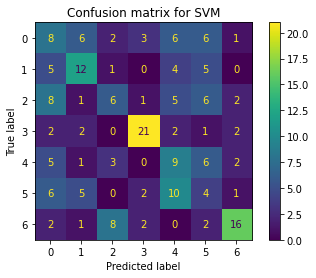

In [14]:
cm = confusion_matrix(y_test, predictions_svm) # confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)# display confusion matrix
disp.plot()
disp.ax_.set_title('Confusion matrix for SVM')

print('Precision: %.3f' % precision_score(y_test, predictions_svm, average='weighted')) 
print('Recall: %.3f' % recall_score(y_test, predictions_svm, average='weighted')) 
print('Accuracy: %.3f' % accuracy_score(y_test, predictions_svm))
print('F1 Score: %.3f' % f1_score(y_test, predictions_svm, average='weighted'))

### 2.3. cross validation for SVM

In [15]:
scores = cross_val_score(classifier, features, df['actual'], cv=5)
cv_score_svm = scores.mean()
cv_score_svm

0.4064000605922896

## Task 3: Comparison
#### Compare the results from the 2 models SVM and GMM. Choose the one that you think worked best with this dataset. Justify your answer based on the results from the evaluation step.

In [16]:
print("Average Scores for GMM ")
print("Average precision score: " + str(sum(prec_lst) / len(prec_lst)))
print("Average recall score: " + str(sum(recall_lst) / len(recall_lst)))
print("Average accuracy score: " + str(sum(accuracy_lst) / len(accuracy_lst)))
print("Average F1 score: " + str(sum(f1_lst) / len(f1_lst)))
print()
print("Scores for SVM ")
print('Precision: %f' % precision_score(y_test, predictions_svm, average='weighted')) 
print('Recall: %f' % recall_score(y_test, predictions_svm, average='weighted')) 
print('Accuracy: %f' % accuracy_score(y_test, predictions_svm))
print('F1 Score: %f' % f1_score(y_test, predictions_svm, average='weighted'))
print('5 fold CV accuracy %f' % cv_score_svm)

Average Scores for GMM 
Average precision score: 0.21098104883493374
Average recall score: 0.2
Average accuracy score: 0.2
Average F1 score: 0.18740037455552855

Scores for SVM 
Precision: 0.394122
Recall: 0.374384
Accuracy: 0.374384
F1 Score: 0.380374
5 fold CV accuracy 0.406400


As you can see (see the cell above), comparing results from GMM and SVM, we can surely say that SVM works better with almost 41% of efficiency, while GMM's accuracy rate is just 20% (twice as small as SVM's). Moreover, if we compare other metrics scores for GMM and SVM (see the cell above), still SVM is a better model to consider. 

Although both 41% and 20% are not highly accurate model rates, considering the size of the dataset, we could say that this is an expected result. There are approximately 100-120 instances of each emotion, and by using 5 fold cross validation, we significantly cut the number of training samples. I belive, having more training data would help us to improve the model. 


## Task 4: test on Phoebe

#### Use the model that you chose in step 3 and classify the Phoebe dataset and report the results. Compare the results from the given labels (folder names). How accurately did your model work? 

### 4.1. Read the dataset and normalize it, add a column  AU28_c

In [17]:
phoebe = pd.read_csv('Phoebe/phoebe.csv')
zeros = np.zeros(98)
phoebe.insert(34, "AU28_c", zeros, True)


### 4.2. Apply the model that we used (instead of number labels, use string labels)

In [18]:
## split features and labels
X = df.iloc[:, 2:37]
y = df.iloc[:, 37:38]

classifier = svm.SVC(kernel="linear", C=2).fit(X, y)
phoebe_predicted = svm.SVC.predict(classifier,(phoebe.iloc[:, 2:37])) #predict the samples
phoebe.insert(38, "predicted", phoebe_predicted, True) #add a column of predicted data
comparison_table_ph = phoebe[['file_name','label', 'predicted']] # separate necessary columns for comparison
comparison_table_ph.to_csv('Phoebe_comparison.csv') #saving the file

/Users/karlykussainova/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karlykussainova/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


### 4.3. Apply metrics

Precision: 0.368
Recall: 0.306
Accuracy: 0.306
F1 Score: 0.312


/Users/karlykussainova/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/karlykussainova/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


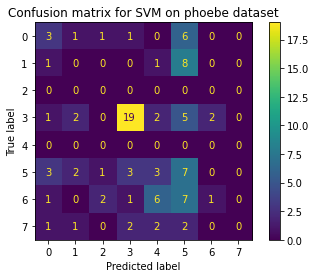

In [19]:
cm = confusion_matrix(phoebe['label'], phoebe_predicted) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set_title('Confusion matrix for SVM on phoebe dataset')

print('Precision: %.3f' % precision_score(phoebe['label'], phoebe_predicted, average='weighted'))
print('Recall: %.3f' % recall_score(phoebe['label'], phoebe_predicted, average='weighted'))
print('Accuracy: %.3f' % accuracy_score(phoebe['label'], phoebe_predicted))
print('F1 Score: %.3f' % f1_score(phoebe['label'], phoebe_predicted, average='weighted'))

As you can see from the matrix as well as the metrics scores, the accuracy is at the 30.6%. This is an expected result, knowing that Phoebe dataset has almost the same distribution as FER2013 dataset (consider the fact that Phoebe dataset was edited by us when we added column AU28_c). Another fact to consider about Phoebe dataset is that even by comparing the images manually, we can notice how two datssets differ from each other based on the colors and the quality of the images. 

## Taks 5: Classify the unknown. 
#### Finally, feed the images from the “unknown” folder to your model. Which category did your model choose for each one of them? What do you think - are the labels correct?

In [20]:
# sort out only those with an unknown label
comparison_table_ph[comparison_table_ph['label'] == 'unknown']

,file_name,label,predicted
0,1_01.jpg,unknown,sad
11,8_01.jpg,unknown,happy
13,9_41.jpg,unknown,angry
14,10_51.jpg,unknown,neutral
15,11_01.jpg,unknown,happy
27,19_02.jpg,unknown,disgust
74,41_06.jpg,unknown,sad
93,52_31.jpg,unknown,neutral


As you can see from the table, there are just 8 instances of an 'unknown' class : 2 of them are classified as 'happy', 2 as 'neutral',  2 more as 'sad',  1'angry', and 1 'disgust'. But let's see how the real images look like!


We were given a dataset of over 800 samples of people feeling "sad","happy", "fear","neutral","surprised","disgust", "angry". We trained an ML model based on the dataset, and gave 8 absolutely unknown images to the model classify. This is how our model classified the unknown images: 


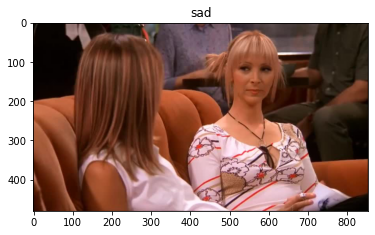

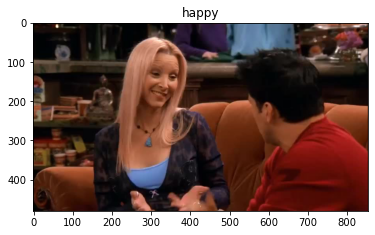

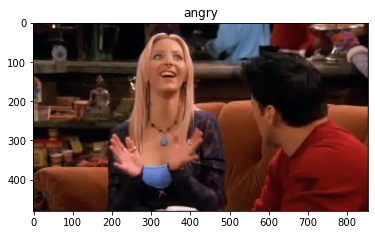

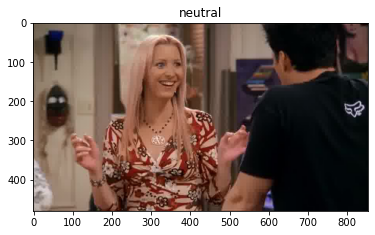

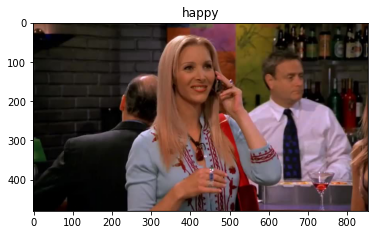

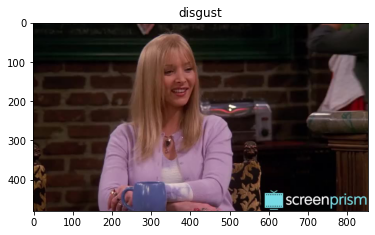

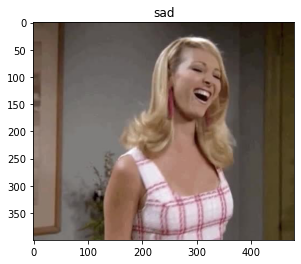

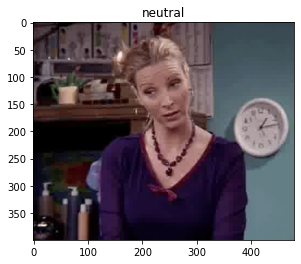

In [22]:
## display images along with their predicted emotion
file_names = comparison_table_ph[comparison_table_ph['label'] == 'unknown']['file_name'].tolist()
predicted_labels = comparison_table_ph[comparison_table_ph['label'] == 'unknown']['predicted'].tolist()
paths = [[],[],[],[],[],[],[],[]]
path_string = 'Phoebe/images/unknown/'
text = 'We were given a dataset of over 800 samples of people feeling "sad","happy", "fear","neutral",\
"surprised","disgust", "angry". \
We trained an ML model based on the dataset, and gave 8 absolutely unknown images to the model classify. \
This is how our model classified the unknown images: '
print(text)
for i in range(8):
    paths[i].append(path_string + file_names[i])

for j in range(8):
    img = mpimg.imread(paths[j][0])
    imgplot = plt.imshow(img)
    plt.title(predicted_labels[j])
    plt.show()

From what I see, the model did a good job with 'happy' social signalling. 

I'm also convinced that the model's second best classification is 'sad'. Although the second picture(Phoebe is yelling) doesn't necessarily look sad, the 'general social signals' for 'sad' are there. In other words, the actress's mouth looks like she's crying, eyes are closed, mouth open, eyelids and eyebrowns are down. These AU-trained model recognized some signals from 'sadness' that it learnt on 800 sample example earlier, and fairly labeled the second image as 'sad'

The labels 'angry' and 'disgust' are more or less fairly classified. 

The least matching social signal was 'neutral'. From my point of view, the pictures absolutely do not match with their fresh lables. Clearly, the first image should be classified as 'happy' or 'surprised', while the second one as 'disgust'



### Now, what if we train the model based on all the data available except for 'unknown'

In [82]:
fer = df.iloc[:, 0:38]
fer_2013 = fer[fer['label'] != 'unknown']

phoebe_known = phoebe[phoebe['label']!= 'unknown']

frames = [fer_2013, phoebe_known]
full_dataset = pd.concat(frames)
full_dataset.drop(['confidence', 'predicted'], axis=1)
X = full_dataset.iloc[:,2:37]
y = full_dataset['label']

classifier = svm.SVC(kernel="linear", C=2).fit(X, y)

unknowns = phoebe[phoebe['label'] == 'unknown']

phoebe_predicted = svm.SVC.predict(classifier,(unknowns.iloc[:, 2:37])) #predict the samples
unknowns.insert(38, "new", phoebe_predicted, True) #add a column of predicted data
table = unknowns[['file_name','label', 'new']] # separate necessary columns for comparison
#comparison_table_ph.to_csv('Phoebe_comparison.csv') #saving the file

/Users/karlykussainova/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


This is how our fully trained model classified the unknown images: 


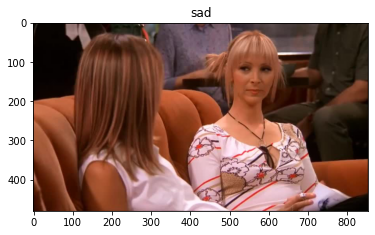

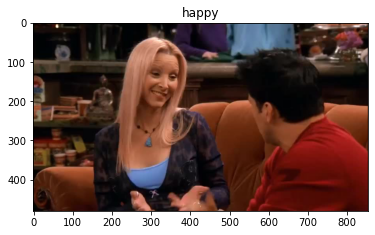

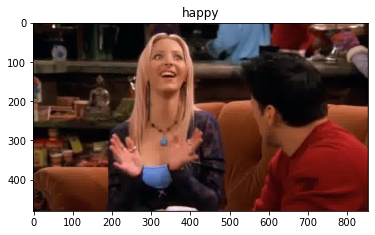

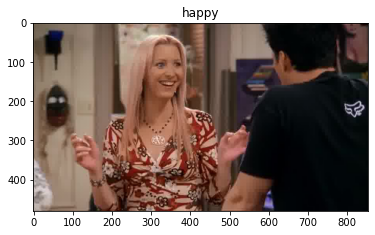

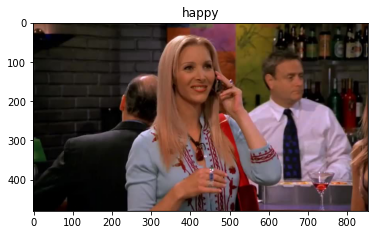

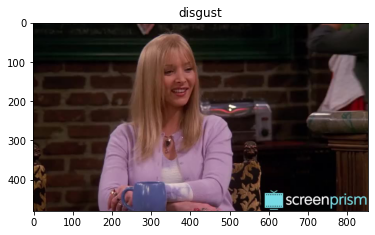

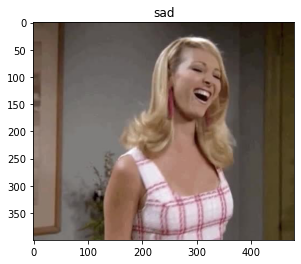

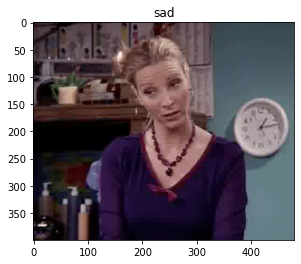

In [85]:
## display images along with their predicted emotion
file_names = comparison_table_ph[comparison_table_ph['label'] == 'unknown']['file_name'].tolist()
predicted_labels = table[table['label'] == 'unknown']['new'].tolist()
paths = [[],[],[],[],[],[],[],[]]
path_string = 'Phoebe/images/unknown/'
text = 'This is how our fully trained model classified the unknown images: '
print(text)
for i in range(8):
    paths[i].append(path_string + file_names[i])

for j in range(8):
    img = mpimg.imread(paths[j][0])
    imgplot = plt.imshow(img)
    plt.title(predicted_labels[j])
    plt.show()

As you see, the more training data we have, the better model performs.
This model is most successful with classifiying 'happy'

# DRAFT